In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import average,complete,single,weighted,centroid
import plotly.figure_factory as ff
import scipy.spatial as scs
from scipy.spatial.distance import pdist,squareform
from numpy import savetxt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch
import matplotlib
import seaborn as sns; sns.set()
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list,linkage
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [27]:
import pickle

In [28]:
with open('Single_instance_matrixframe.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

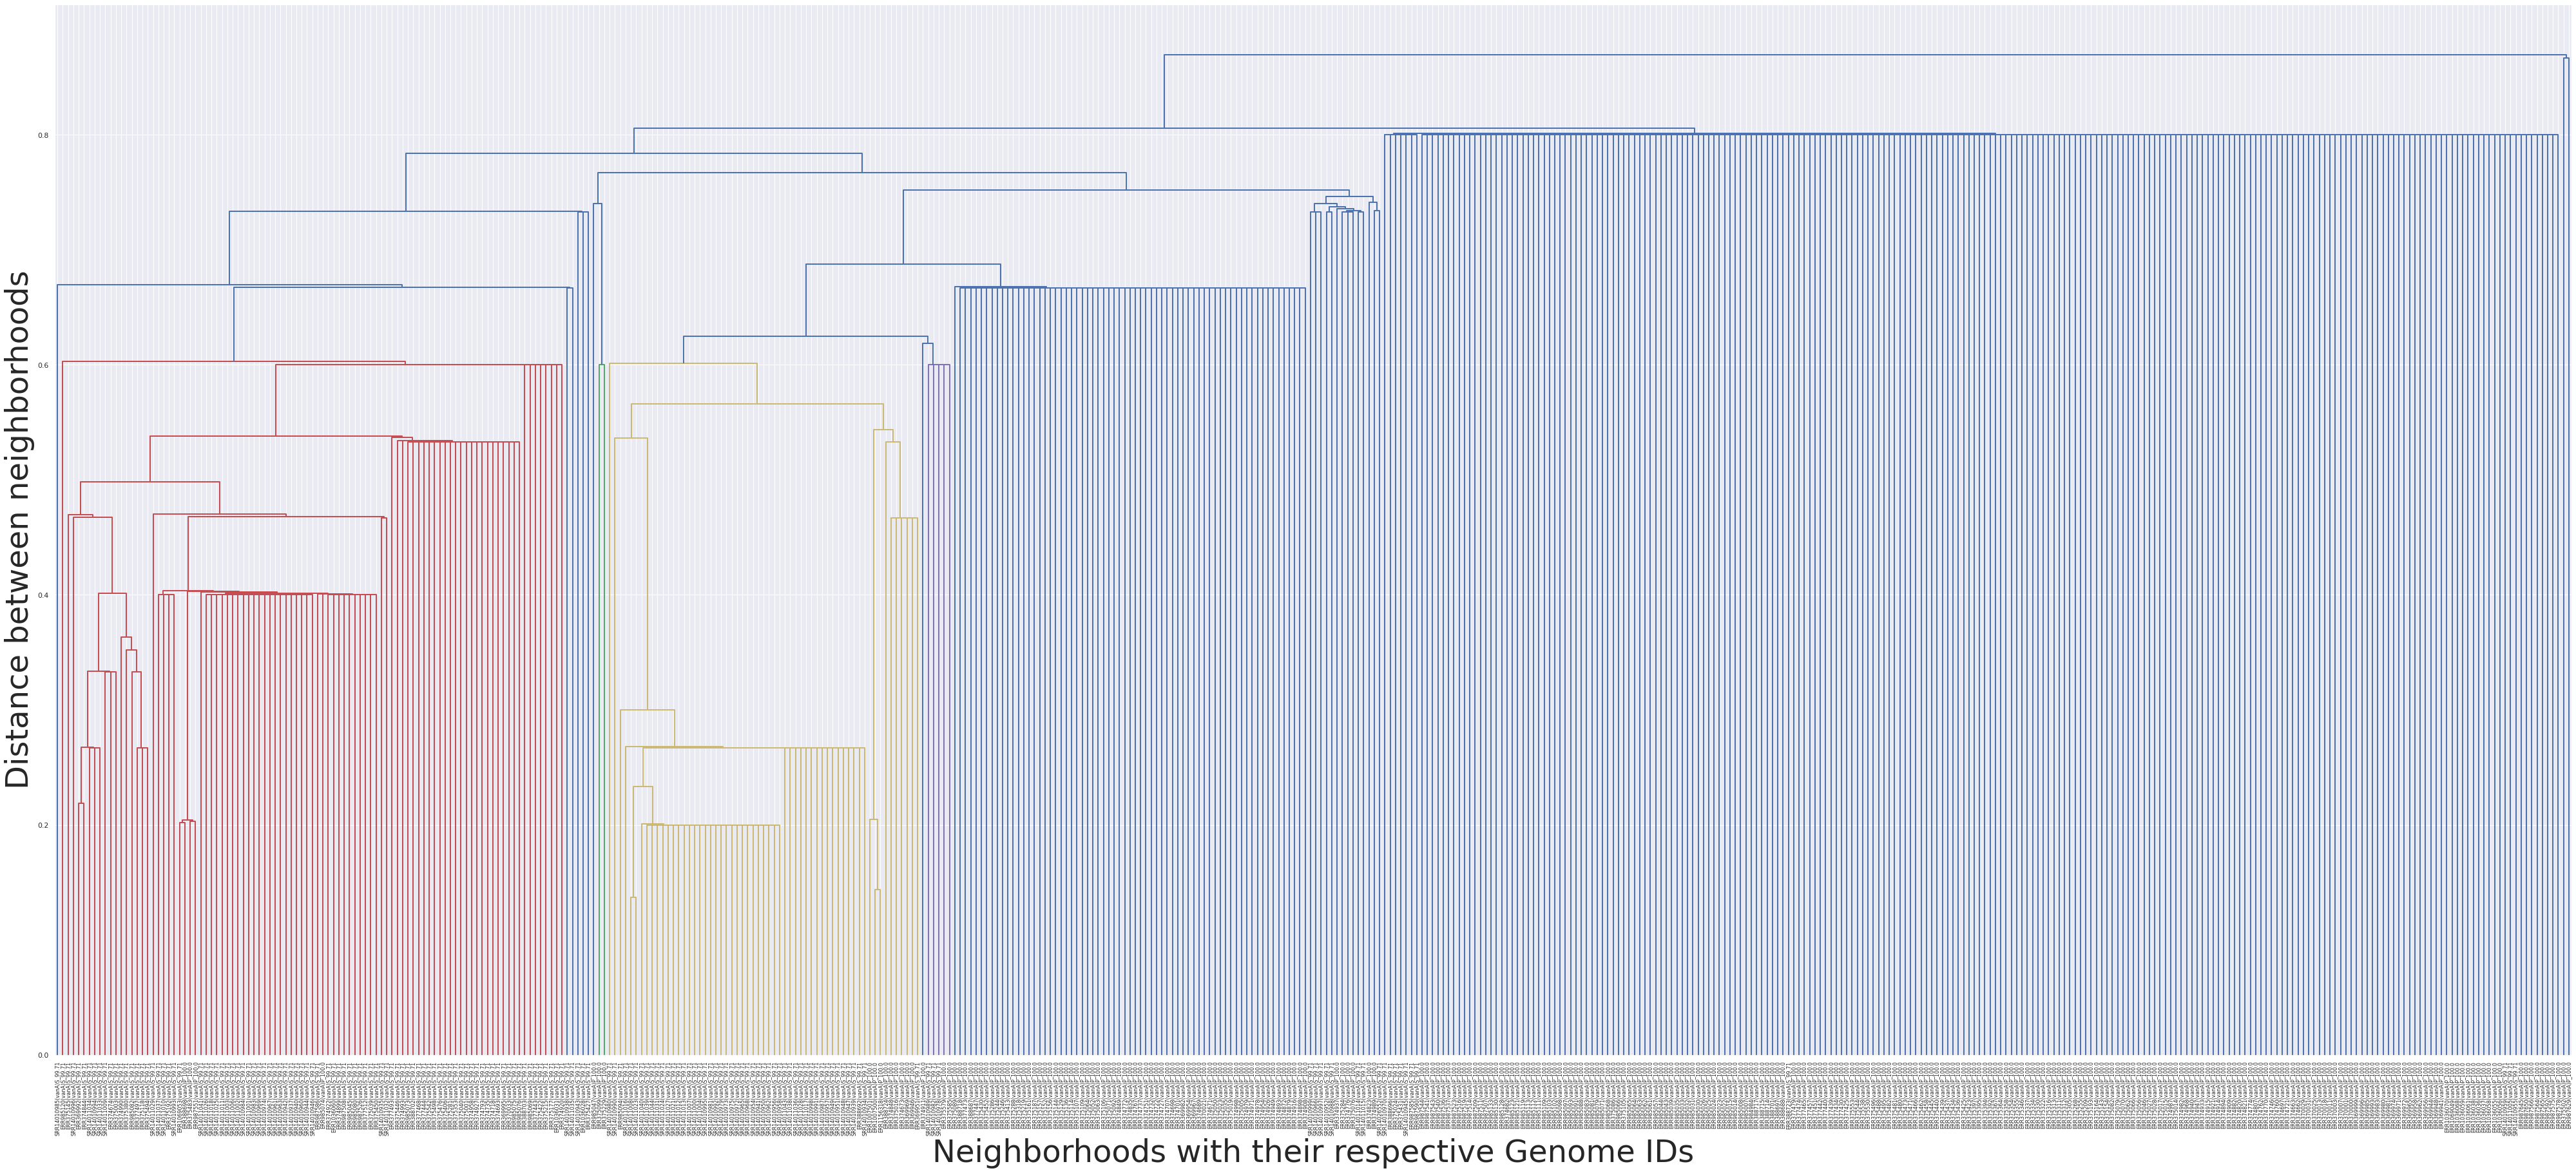

In [31]:
hierarchy.set_link_color_palette(['r', 'g', 'y', 'm'])
matplotlib.rcParams['lines.linewidth'] = 2
for i,j in loaded_dict.items(): 
    if len(j)>1:
        max_d = 50
        df = pd.DataFrame(j,columns=j.keys())
        r  = df.values
        df = df.transform(lambda x: 1 - x/r.max() )
        df = df.round(decimals=3)
        Y = df.values
        np.fill_diagonal(Y, 0)
        Y = distance.squareform(Y)
        fig = plt.figure(figsize=(70,30))
        Z = hierarchy.linkage(Y, 'average')
        R=dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=j.keys())
        savename= i+"_.png"
        plt.ylabel("Distance between neighborhoods", fontsize=48)
        plt.xlabel("Neighborhoods with their respective Genome IDs", fontsize=48)
        plt.savefig(savename,bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()

In [21]:
import scipy
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [22]:
# Cophenetic Correlation Coefficient. Based on this coefficient avaerage method is the best
scipy.cluster.hierarchy.cophene = cophenet(Z, Y)
scipy.cluster.hierarchy.cophene

(0.9495706990900151,
 array([0.205     , 0.78373208, 0.78373208, ..., 0.26703664, 0.75214881,
        0.75214881]))

Text(0.5, 1.0, 'The Silhouette Method')

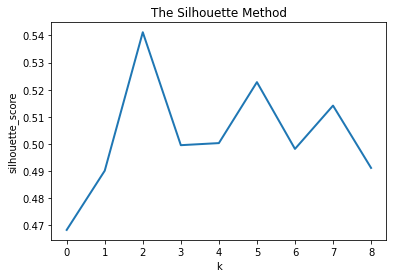

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(Z)
    labels = kmeans.labels_
    sil.append(silhouette_score(Z, labels, metric = 'euclidean'))
k = list(range(0, 9))
plt.plot(k, sil)
plt.ylabel("silhouette_score")
plt.xlabel("k")
plt.title('The Silhouette Method')

Text(0.5, 1.0, 'The Elbow Method')

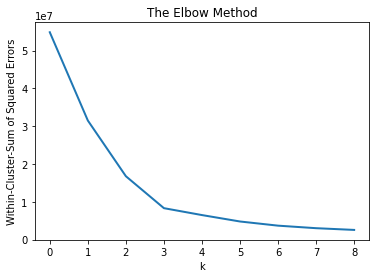

In [25]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse
Elbow = calculate_WSS(Z, 9)
k = list(range(0, 9))
plt.plot(k, Elbow)
plt.ylabel("Within-Cluster-Sum of Squared Errors")
plt.xlabel("k")
plt.title('The Elbow Method')